In [1]:
import wget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm

from tcn import TCN

In [2]:
df=pd.read_csv('SalesOrder2018.csv')

In [4]:
# Converting Date into Datetime format
df['Date']=pd.to_datetime(df['Date'])

In [6]:
#Setting Date column as the Index of the data frame
df.set_index('Date',inplace=True)

In [7]:
df.head()

,Orders
Date,
2018-01-01,14375.67
2018-02-01,15635.32
2018-03-01,13526.79
2018-04-01,19046.00
2018-05-01,11703.39


In [16]:
df.shape

(37, 1)

In [8]:
lookback_window = 12

In [9]:
df=df.values

In [11]:
x = []
y = []
for i in tqdm(range(lookback_window, len(df))):
    x.append(df[i - lookback_window:i])
    y.append(df[i])

In [12]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(25, 12, 1)
(25, 1)


In [13]:
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
tcn (TCN)                    (None, 64)                91136     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile('adam','mae')

In [15]:

print('Train...')
model.fit(x, y, epochs=100)

Train...
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 116870.7031
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 179850.7812
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 146855.1875
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 68047.2969
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 52830.9766
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 89171.3594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 77754.8672
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 40007.3047
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 34576.3750
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 50582.9805
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 55197.5391
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 41006.11

In [17]:

predict = model.predict(x)

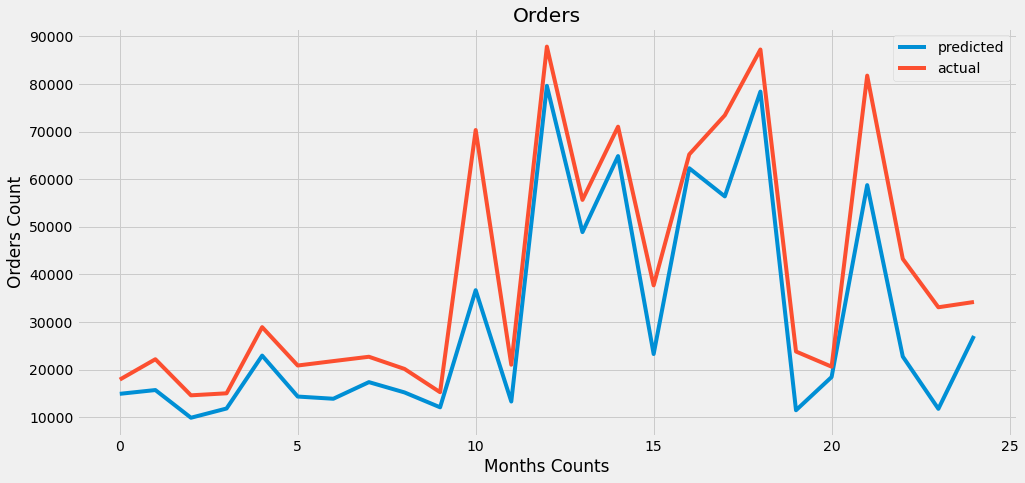

In [20]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Orders')
plt.legend(['predicted', 'actual'])
plt.xlabel("Months Counts")
plt.ylabel("Orders Count")
plt.show()